In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display as ipd
import seaborn as sns
import librosa
import librosa.display
import soundfile
import os

In [3]:
pip freeze

aiohttp==3.9.3
aiosignal==1.3.1
alembic==1.13.1
altair==4.1.0
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1624539388359/work/dist
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1610522573621/work
arrow==1.3.0
async-generator==1.10
async-timeout==4.0.3
attrs==23.2.0
audioread==3.0.1
Babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1619719576210/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1601745390275/work
bleach @ file:///home/conda/feedstock_root/build_artifacts/bleach_1626371669429/work
blinker==1.4
bokeh @ file:///home/conda/feedstock_root/build_artifacts/bokeh_1625756941579/w

widgetsnbextension @ file:///home/conda/feedstock_root/build_artifacts/widgetsnbextension_1605475529901/work
xlrd @ file:///home/conda/feedstock_root/build_artifacts/xlrd_1610224409810/work
xyzservices==2023.10.1
yarl==1.9.4
zict==2.0.0
zipp @ file:///home/conda/feedstock_root/build_artifacts/zipp_1625284368454/work
Note: you may need to restart the kernel to use updated packages.


## Using Crema Data (haven't used other filepaths)

In [23]:
# Using Crema
get_dir = Path('/home/adapsay/data/Crema')

In [24]:
%pwd

'/home/adapsay/ds3-audio/notebooks'

In [25]:
filepaths = list(get_dir.glob('*'))
filepaths  

[PosixPath('/home/adapsay/data/Crema/1054_IEO_DIS_LO.wav'),
 PosixPath('/home/adapsay/data/Crema/1001_TSI_ANG_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1019_IOM_DIS_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1068_WSI_DIS_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1025_ITS_DIS_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1006_DFA_NEU_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1037_IWL_NEU_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1076_WSI_DIS_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1007_IOM_DIS_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1029_IWL_NEU_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1018_DFA_NEU_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1054_DFA_FEA_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1065_IWL_FEA_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1055_ITS_ANG_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1066_DFA_HAP_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1057_IWL_HAP_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/106

### Retrieve Labels for Audio

In [11]:
labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))
labels

['DIS',
 'ANG',
 'DIS',
 'DIS',
 'DIS',
 'NEU',
 'NEU',
 'DIS',
 'DIS',
 'NEU',
 'NEU',
 'FEA',
 'FEA',
 'ANG',
 'HAP',
 'HAP',
 'ANG',
 'FEA',
 'ANG',
 'FEA',
 'HAP',
 'HAP',
 'ANG',
 'ANG',
 'ANG',
 'SAD',
 'SAD',
 'DIS',
 'NEU',
 'SAD',
 'SAD',
 'SAD',
 'FEA',
 'FEA',
 'SAD',
 'HAP',
 'SAD',
 'HAP',
 'HAP',
 'ANG',
 'DIS',
 'DIS',
 'HAP',
 'DIS',
 'HAP',
 'FEA',
 'ANG',
 'SAD',
 'NEU',
 'FEA',
 'DIS',
 'NEU',
 'ANG',
 'FEA',
 'ANG',
 'NEU',
 'NEU',
 'FEA',
 'HAP',
 'HAP',
 'HAP',
 'ANG',
 'HAP',
 'ANG',
 'HAP',
 'HAP',
 'SAD',
 'ANG',
 'ANG',
 'SAD',
 'FEA',
 'SAD',
 'SAD',
 'HAP',
 'FEA',
 'NEU',
 'SAD',
 'FEA',
 'FEA',
 'HAP',
 'NEU',
 'DIS',
 'FEA',
 'DIS',
 'NEU',
 'FEA',
 'NEU',
 'SAD',
 'FEA',
 'DIS',
 'DIS',
 'FEA',
 'NEU',
 'SAD',
 'NEU',
 'NEU',
 'HAP',
 'DIS',
 'HAP',
 'DIS',
 'DIS',
 'FEA',
 'DIS',
 'HAP',
 'SAD',
 'SAD',
 'ANG',
 'SAD',
 'ANG',
 'DIS',
 'NEU',
 'SAD',
 'NEU',
 'HAP',
 'ANG',
 'ANG',
 'NEU',
 'FEA',
 'ANG',
 'ANG',
 'FEA',
 'DIS',
 'HAP',
 'ANG',
 'DIS',


In [12]:
set(labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

In [13]:
len(filepaths) == len(labels)

labels_wav = []
for i in range(len(filepaths)):
    labels_wav.append([labels[i], filepaths[i]])
    

### Assign Emotion Label to .wav File (should match)

In [14]:
labeled_wav = pd.DataFrame(labels_wav, columns = ['Emotion', '.wav file'])
labeled_wav

,Emotion,.wav file
0,DIS,/home/adapsay/data/Crema/1054_IEO_DIS_LO.wav
1,ANG,/home/adapsay/data/Crema/1001_TSI_ANG_XX.wav
2,DIS,/home/adapsay/data/Crema/1019_IOM_DIS_XX.wav
3,DIS,/home/adapsay/data/Crema/1068_WSI_DIS_XX.wav
4,DIS,/home/adapsay/data/Crema/1025_ITS_DIS_XX.wav
...,...,...
7437,ANG,/home/adapsay/data/Crema/1053_IOM_ANG_XX.wav
7438,ANG,/home/adapsay/data/Crema/1022_WSI_ANG_XX.wav
7439,HAP,/home/adapsay/data/Crema/1073_IWL_HAP_XX.wav
7440,ANG,/home/adapsay/data/Crema/1071_ITS_ANG_XX.wav


### Testing Audio

In [19]:
tsi_ang_xx = ipd.Audio(labeled_wav['.wav file'].astype(str).iloc[1])
tsi_ang_xx

In [28]:
wsi_dis_xx = ipd.Audio(labeled_wav['.wav file'].astype(str).iloc[3])
wsi_dis_xx

In [29]:
iwl_hap_xx = ipd.Audio(labeled_wav['.wav file'].astype(str).iloc[7439])
iwl_hap_xx

In [47]:
labeled_wav.shape

(7442, 2)

In [62]:
def play_audio_at_idx(i):
    # display audio recording
    audio = ipd.Audio(labeled_wav['.wav file'].astype(str).iloc[i])

    # create string that represents phrase and labeled emotion at certain index
    phrase_emotion = str(labeled_wav['.wav file'].iloc[i]).split('_')[1] + ' ' + \
    str(labeled_wav['Emotion'].iloc[i])

    print(phrase_emotion)
    return audio

# test
play_audio_at_idx(2)

IOM DIS


### Testing Discrete Fourier Transform, Converting into Magnitude Spectrum Graph using Angry .wav file

In [31]:
ang, sr = librosa.load(labeled_wav['.wav file'].astype(str).iloc[1])
ang.shape

(55181,)

In [33]:
ang_ft = np.fft.fft(ang)

In [34]:
ang_ft.shape

(55181,)

In [35]:
ang_ft[0]

(1.5668702501827703-3.9968028886505635e-15j)

In [36]:
sr

22050

In [37]:
def magnitude_spectrum_graph(signal, plot_title, sample_rate):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft) # shows frequency value existing in the signal
    
    # graphing magnitude spectrum
    frequency = np.linspace(0, sample_rate, len(magnitude_spectrum))
    plt.plot(frequency, magnitude_spectrum)
    plt.xlabel("Frequency (HZ)")
    plt.title(plot_title)
    
    plt.show()

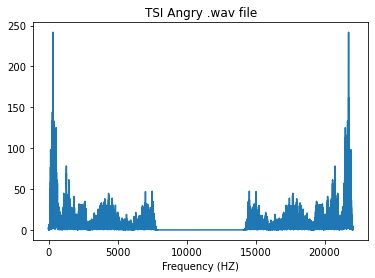

In [39]:
magnitude_spectrum_graph(ang, "TSI Angry .wav file", sr)

### Splitting Graph in Half, Considering Positive Nyquist Frequencies (also because the graph is symmetrical, no need for other half)

In [43]:
def magnitude_spectrum_graph_half(signal, plot_title, sample_rate):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft) # shows frequency value existing in the signal
    
    # graphing magnitude spectrum
    frequency = np.linspace(0, sample_rate // 2, len(magnitude_spectrum) // 2)
    plt.plot(frequency, magnitude_spectrum[:len(frequency)])
    plt.xlabel("Frequency (HZ)")
    plt.ylabel("Magnitude/Strength of Frequency")
    plt.title(plot_title)
    
    plt.show()

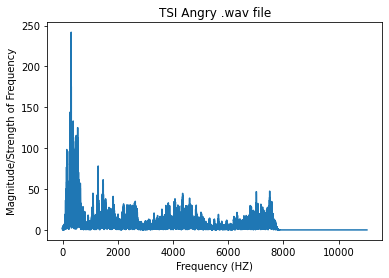

In [45]:
magnitude_spectrum_graph_half(ang, "TSI Angry .wav file", sr)